In [35]:
import torch.nn as nn
import torchvision.models
import torch
import matplotlib.pyplot as plt
import numpy as np

## From scratch AlexNet

In [86]:
scratch_alex = torch.load('AlexNet2.pt')

In [89]:
params_c.shape

(64, 11, 3, 11)

In [95]:
params_c = list(list(scratch_alex.features.children())[0].parameters())[0].detach().cpu().numpy()
# params_c.shape
params_c = np.moveaxis(params_c,1,-1)
params_c = (params_c - params_c.min())/(params_c.max() - params_c.min())

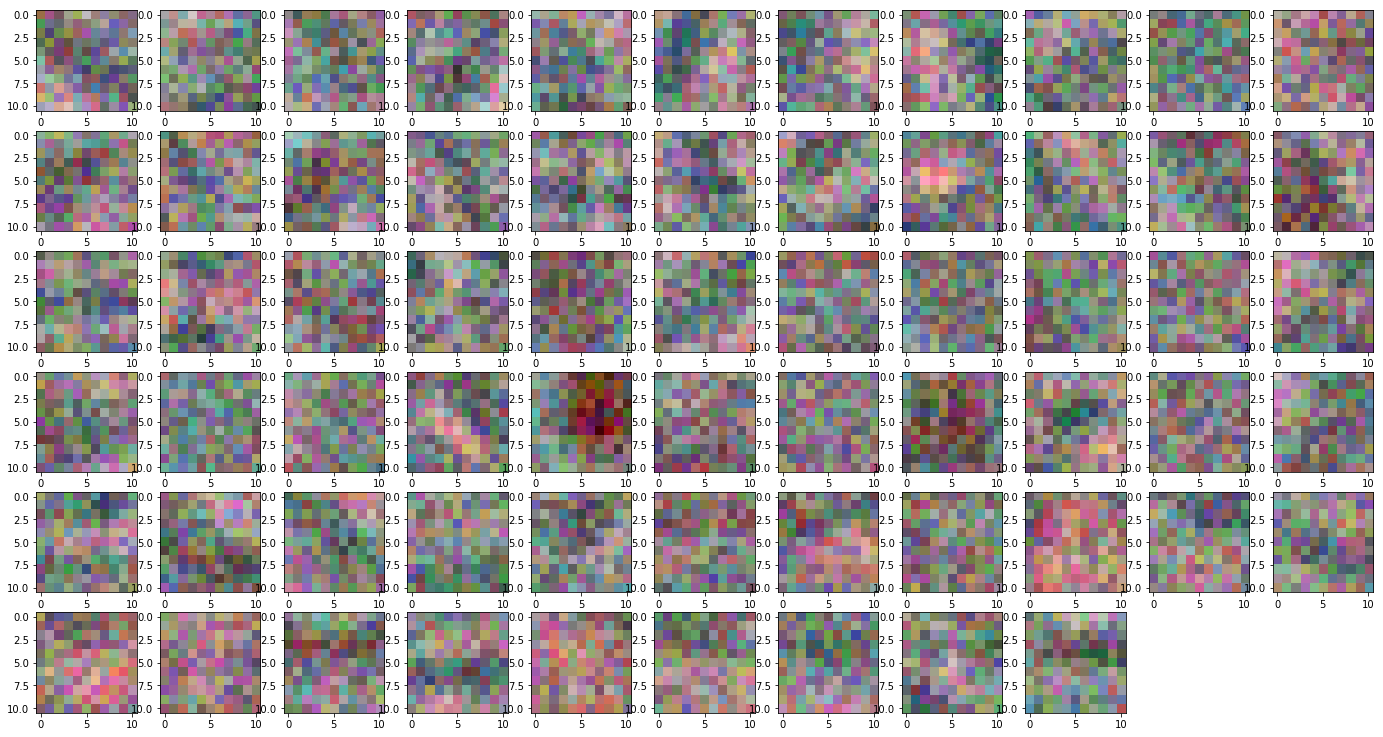

In [96]:
fig = plt.figure(figsize=(24, 24))
for i in range(1,65):
    plt.subplot(11,11,i)
    weights = params_c[i-1,:,:,:]
    plt.imshow(weights)
plt.show()

### Pretrained AlexNet (no changes)

In [47]:
alexnet = torchvision.models.alexnet(pretrained=True)

In [73]:
params_b = list(list(alexnet.features.children())[0].parameters())[0].detach().cpu().numpy()
# Normalised [0,255] as integer
params_b = np.moveaxis(params_b,1,-1)
params_b.shape
params_b.min()
params_b = (params_b - params_b.min())/(params_b.max() - params_b.min())

In [74]:
params_b.shape

(64, 11, 11, 3)

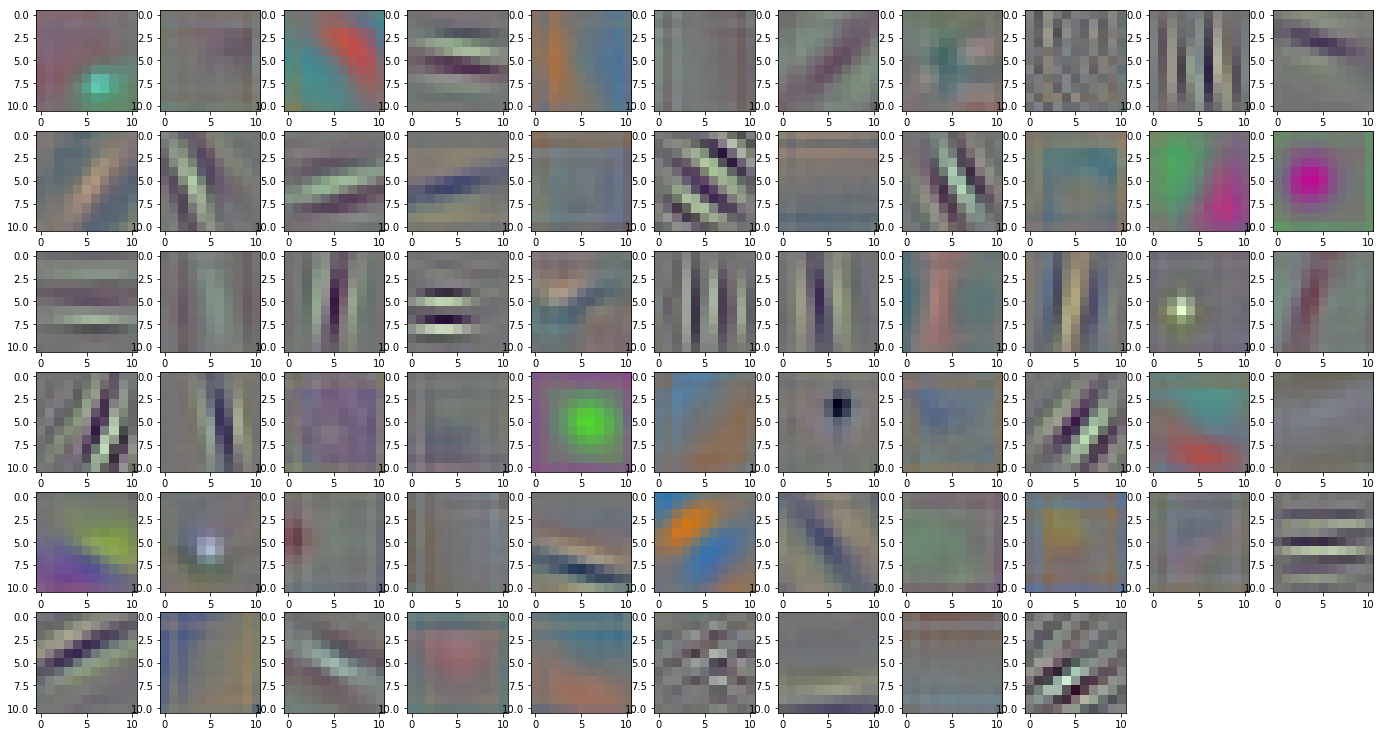

In [75]:
fig = plt.figure(figsize=(24, 24))
for i in range(1,65):
    plt.subplot(11,11,i)
    weights = params_b[i-1,:,:,:]
    plt.imshow(weights)
plt.show()

## Fine Tuned AlexNet on Face2year

In [4]:
alexnetfine = torch.load('AlexNetFinetuned2.pt')

In [76]:
params = list(list(alexnetfine.features.children())[0].parameters())[0].detach().cpu().numpy()
params = np.moveaxis(params,1,-1)
params = (params - params.min())/(params.max() - params.min())

In [77]:
params[0].shape

(11, 11, 3)

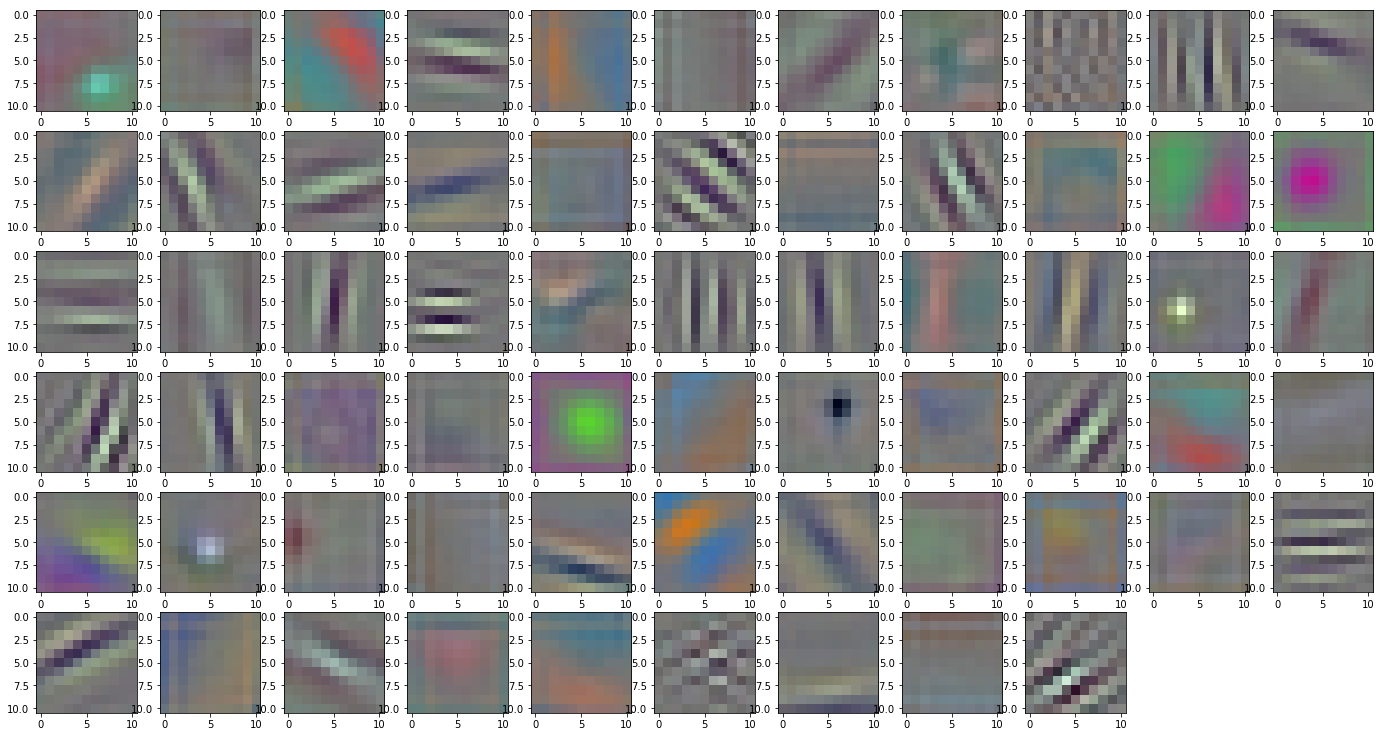

In [82]:
fig = plt.figure(figsize=(24, 24))
for i in range(1,65):
    plt.subplot(11,11,i)
    weights = params[i-1,:,:,:]
    plt.imshow(weights)
plt.show()

## Difference between pretrained and finetuned AlexNet

In [83]:
params_diff = params - params_b

In [84]:
params_diff = (params_diff - params_diff.min())/(params_diff.max() - params_diff.min())

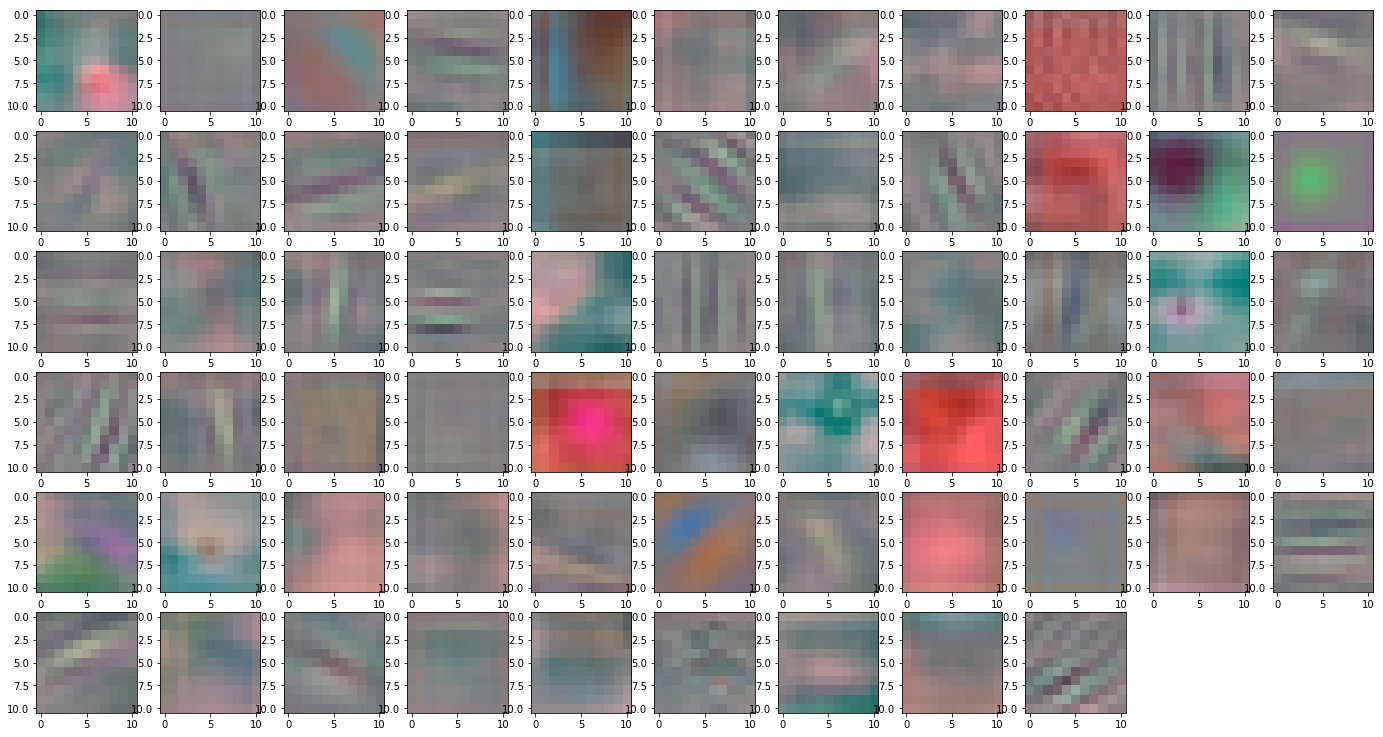

In [85]:
fig = plt.figure(figsize=(24, 24))
for i in range(1,65):
    plt.subplot(11,11,i)
    weights = params_diff[i-1,:,:,:]
    plt.imshow(weights)
plt.show()